# Linear Regression Demo

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
os.getcwd()

'/Users/Edureka/Python'

## Import Dataset

In [2]:
insurance=pd.read_csv('../insurance.csv')

## Exploratory Data Analysis

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


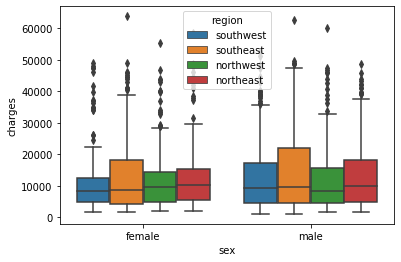

In [5]:
sns.boxplot(x='sex',y='charges',hue='region',data=insurance)

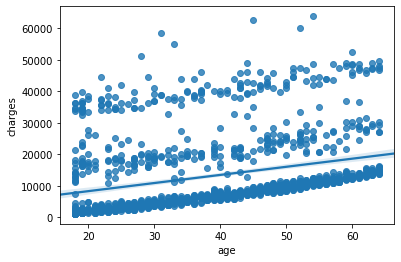

In [6]:
sns.regplot(x='age',y='charges',data=insurance)
plt.show()

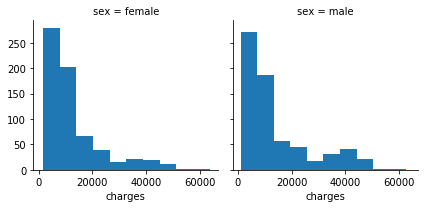

In [7]:
fig=sns.FacetGrid(insurance,col='sex')
fig.map(plt.hist,'charges')

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

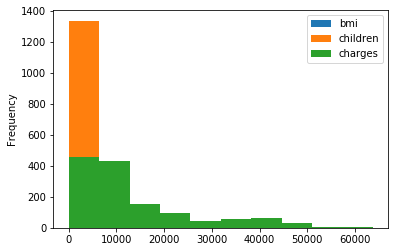

In [9]:
insurance.plot('age',kind='hist')

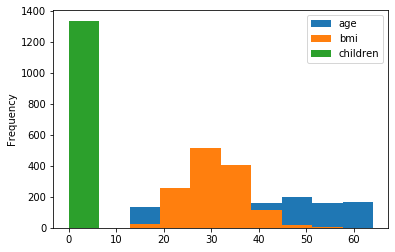

In [10]:
insurance.plot('charges',kind='hist')

## Convert Categorical Columns to Numeric

### Get Dummies 

In [11]:
processed_data=pd.get_dummies(insurance)

### Label Encoder

In [12]:
le=LabelEncoder()
qualitative=[c for c in insurance.columns if insurance.dtypes[c]=='object']
le_sex=LabelEncoder()
le_smoker=LabelEncoder()
le_region=LabelEncoder()
insurance[qualitative[0]]=le_sex.fit_transform(insurance[qualitative[0]])
insurance[qualitative[1]]=le_sex.fit_transform(insurance[qualitative[1]])
insurance[qualitative[2]]=le_sex.fit_transform(insurance[qualitative[2]])
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
processed_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Scaler  - Standard Scaler used here to scale the data

In [14]:
scaler=StandardScaler()
x=scaler.fit_transform(insurance) 
cols=insurance.columns
scaled_df=pd.DataFrame(x,columns=cols)

## Split the target and predictors to y and x variables

In [15]:
#y=processed_data['charges']
#x=processed_data.drop('charges',axis=1)
y=scaled_df['charges']
x=scaled_df.drop('charges',axis=1)
cols=x.columns
len(cols)

6

### Split the processed dataset into train and test datasets

In [16]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.30)

In [17]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((936, 6), (936,), (402, 6), (402,))

In [18]:
ytrain.head(),xtrain.head()

(744   -0.367041
 363   -0.881637
 10    -0.871432
 970   -0.212117
 634   -0.320440
 Name: charges, dtype: float64,
           age       sex       bmi  children    smoker    region
 744  0.768473  0.989591 -0.697746 -0.908614 -0.507463 -0.466915
 363 -1.296362 -1.010519 -0.699387 -0.078767 -0.507463  1.343905
 10  -1.011557  0.989591 -0.728915 -0.908614 -0.507463 -1.372326
 970  0.768473 -1.010519 -0.410668  1.580926 -0.507463  0.438495
 634  0.839674  0.989591  1.482405 -0.078767 -0.507463  1.343905)

## Instantiate Linear Regression Model

In [19]:
lm=LinearRegression()

### Create the Linear Regression Model

In [84]:
regressor=lm.fit(xtrain,ytrain)
# R Sqaured Value
print('R Squared Value : ',regressor.score(xtrain,ytrain))
print('Coefficient/Slope/M Value :',regressor.coef_)
print('Intercept Value :',regressor.intercept_)

R Squared Value :  0.7544083642384214
Coefficient/Slope/M Value : [ 0.29254799 -0.0116126   0.15938599  0.03498638  0.80153266 -0.0290586 ]
Intercept Value : 0.005664780213938143


## Predict the model with test dataset

In [21]:
result=model.predict(xtest)


## Check Accuracy for the model

In [115]:
mse=mean_squared_error(ytest,result)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(ytest,result))

0.5010806441864702
0.7403677168975319


## Without Scaler

In [23]:
test=insurance['charges']
train=insurance.drop('charges',axis=1)

In [24]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train,test,test_size=0.3,random_state=3)

In [25]:
xtrain1.shape,ytrain1.shape

((936, 6), (936,))

In [126]:
model1=lm.fit(xtrain1,ytrain1)
print('R Squared Value : ',model1.score(xtrain,ytrain))
print('Coefficient/Slope/M Value :',model1.coef_)
print('Intercept Value :',model1.intercept_)

R Squared Value :  -722712816.2353826
Coefficient/Slope/M Value : [  253.36115836  -220.70594228   346.94241087   587.81208659
 24073.94246558  -240.58431891]
Intercept Value : -12346.920683540147


In [127]:
result1=model.predict(xtest1)

In [128]:
mse1=mean_squared_error(result1, ytest1)
rmse1 = np.sqrt(mse1)
print(rmse1)
print(r2_score(ytest1,result1))

6143.357573173839
0.7324000605417352


<Figure size 1440x720 with 0 Axes>

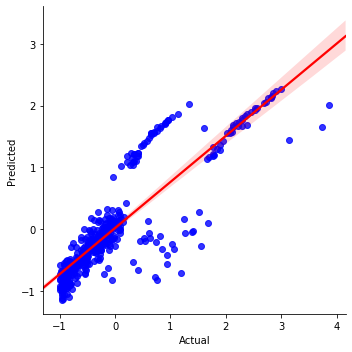

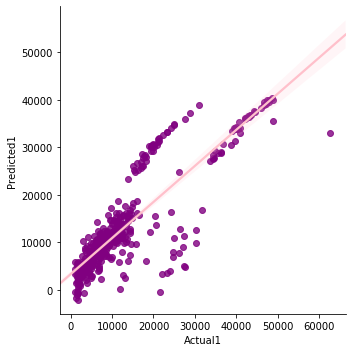

In [131]:
df=pd.DataFrame({'Actual':ytest,'Predicted':result})

df1=pd.DataFrame({'Actual1':ytest1,'Predicted1':result1})
fig=plt.figure(figsize=(20,10))
sns.lmplot(x='Actual',y='Predicted',data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.lmplot(x='Actual1',y='Predicted1',data=df1,scatter_kws={"color": "purple"}, line_kws={"color": "pink"})

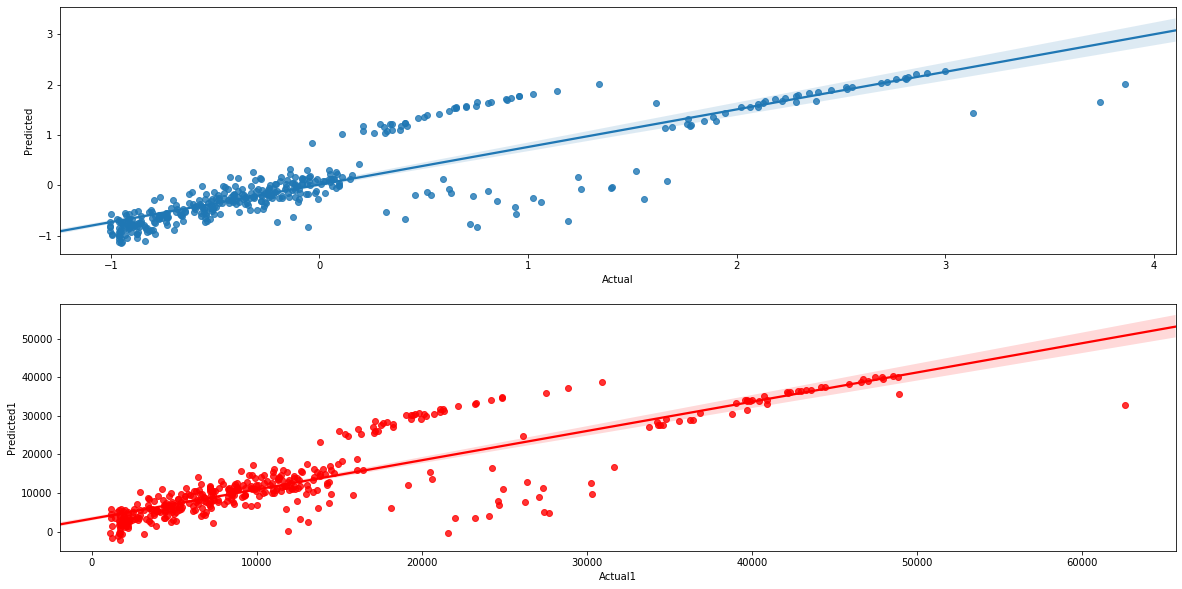

In [77]:
ax=plt.figure(figsize=(20,10))
fig=plt.subplot(2,1,1)
sns.regplot(x='Actual',y='Predicted',data=df)
fig=plt.subplot(2,1,2)
sns.regplot(x='Actual1',y='Predicted1',data=df1,color='red')